In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/gender_classification_v7 2.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [ ]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [ ]:
df.columns




Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [ ]:
x=df.iloc[:,:7]
y=df.iloc[:,-1]


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RC=RandomForestClassifier().fit(xtrain,ytrain)

In [ ]:
pred=RC.predict(xtest)

In [ ]:
pred

array(['Male', 'Male', 'Male', ..., 'Male', 'Female', 'Male'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(pred,ytest)
matrix=confusion_matrix(pred,ytest)

In [ ]:
print(report)

              precision    recall  f1-score   support

      Female       0.98      0.96      0.97       727
        Male       0.96      0.98      0.97       774

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [ ]:
print(matrix)

[[698  29]
 [ 18 756]]


accuracy is : 0.9653564290473018
              precision    recall  f1-score   support

      Female       0.96      0.97      0.96       716
        Male       0.97      0.96      0.97       785

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



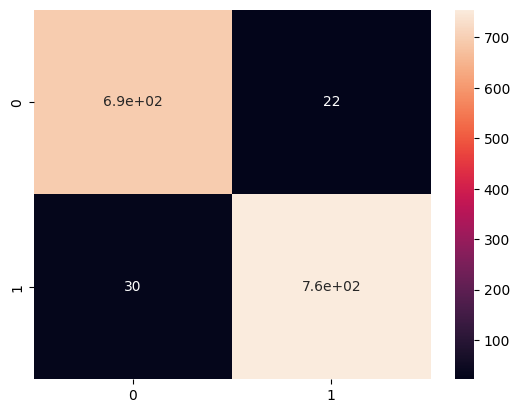

In [ ]:
import seaborn as sns

#Bagging Meta Estimator Classifier
from sklearn.ensemble import BaggingClassifier
#making the bagging classifier with 100 decision trees
model=BaggingClassifier(n_estimators=100)
#fitting data to bagging model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


accuracy is : 0.9706862091938707
              precision    recall  f1-score   support

      Female       0.97      0.97      0.97       716
        Male       0.97      0.97      0.97       785

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



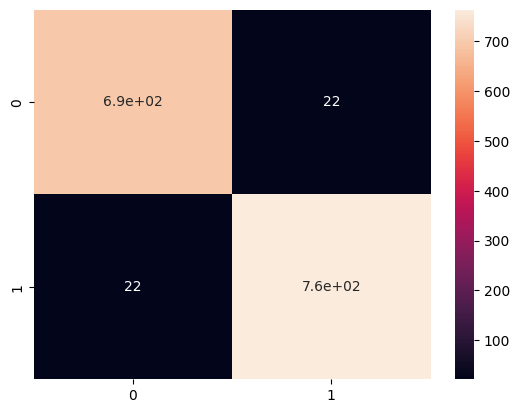

In [ ]:
#Bagging Meta Estimator Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
#making the bagging classifier with 100 Logistic Regression models
model=BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100)
#fitting data to bagging model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

Accuracy is : 0.972018654230513
              precision    recall  f1-score   support

      Female       0.96      0.98      0.97       716
        Male       0.99      0.96      0.97       785

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



<Axes: >

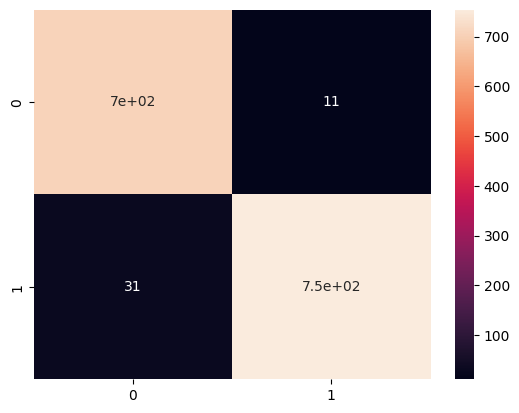

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(xtrain, ytrain)
ypred=model.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
cm
sns.heatmap(cm,annot=True)

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
model_1 = AdaBoostClassifier(random_state=1)
model_1.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=1)

Accuracy is : 0.9726848767488341
              precision    recall  f1-score   support

      Female       0.96      0.98      0.97       716
        Male       0.98      0.97      0.97       785

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



<Axes: >

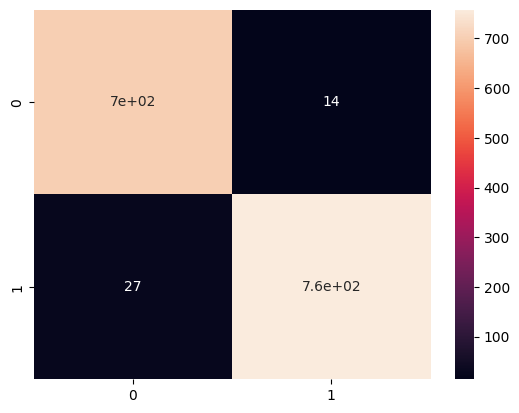

In [ ]:
ypred=model_1.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
cm
sns.heatmap(cm,annot=True)